## Lab 7 : Training A small neural network

Submission Guide: Run all cells and upload your notebook on Gradescope

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset from sklearn
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a custom dataset
class IrisDataset(Dataset):
    def __init__(self, features, labels):
        self.X = features
        self.y = labels

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create dataset and split into train/test
dataset = IrisDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [3]:
# Sample Dataset Output
x,y = dataset[0]
print("Input Features:",x)
print("Output Class:",y)

Input Features: tensor([-0.9007,  1.0190, -1.3402, -1.3154])
Output Class: tensor(0)


In [6]:
def train_and_evaluate(lr, hidden_sizes, batch_size, num_epochs=30):
    """
    Train and evaluate a feedforward network with variable hidden layers.

    Args:
        lr (float): Learning rate for optimizer
        hidden_sizes (list[int]): List of hidden layer sizes, e.g. [16, 8, 4]
        batch_size (int): Mini-batch size
        num_epochs (int): Number of training epochs
    Returns:
        float: Test accuracy percentage
    """
    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define dynamic model
    class DynamicIrisNet(nn.Module):
        def __init__(self, hidden_sizes:list[int]):
            super().__init__()
            layers = []
            input_dim = 4  # Iris features
            output_dim = 3

            # TODO: Use nn.Linear(input_features,output_features) and nn.ReLU as the non-linearity
            # For this dataset, your input is a 4 dimensional vector and you need to output 3 logits (one per class).
            # The hidden_sizes is a list of integers, your model should have one hidden layer of size s for each s in hidden_sizes
            # Do not forget non-linearity
            prev_layer_size = input_dim
            for hidden_size in hidden_sizes:
                layers.append(nn.Linear(prev_layer_size, hidden_size))
                layers.append(nn.ReLU())
                prev_layer_size = hidden_size

            # Output layer (3 classes)
            layers.append(nn.Linear(prev_layer_size, output_dim))

            self.network = nn.Sequential(*layers)


        def forward(self, x):
            #raise NotImplementedError("Implement Forward Pass")
            #pass
            return self.network(x)

    # Initialize model, loss, optimizer
    model = DynamicIrisNet(hidden_sizes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            # Algorithm:
            # Use the zero_grad function to reset the gradients before forward pass
            # Forward Pass
            # Loss function
            # Backward Pass
            # Optimzer Step
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            outputs = model(X_test)
            # Generate Predictions!
            #predicted = torch.ones_like(y_test) * -1 # TODO: Modify this with correct prediction
            _, predicted = torch.max(outputs.data, 1)
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [7]:
learning_rates = [0.001,0.01,0.05]
hidden_sizes = [[8,8,8], [16,8], [32,16,8]]
batch_sizes = [8, 16, 32]

results = []

for lr in learning_rates:
    for h in hidden_sizes:
        for b in batch_sizes:
            acc = train_and_evaluate(lr, h, b)
            results.append((lr, h, b, acc))
            print(f"lr={lr}, hidden={h}, batch={b} ? accuracy={acc:.2f}%")


lr=0.001, hidden=[8, 8, 8], batch=8 ? accuracy=83.33%
lr=0.001, hidden=[8, 8, 8], batch=16 ? accuracy=66.67%
lr=0.001, hidden=[8, 8, 8], batch=32 ? accuracy=63.33%
lr=0.001, hidden=[16, 8], batch=8 ? accuracy=83.33%
lr=0.001, hidden=[16, 8], batch=16 ? accuracy=83.33%
lr=0.001, hidden=[16, 8], batch=32 ? accuracy=83.33%
lr=0.001, hidden=[32, 16, 8], batch=8 ? accuracy=90.00%
lr=0.001, hidden=[32, 16, 8], batch=16 ? accuracy=66.67%
lr=0.001, hidden=[32, 16, 8], batch=32 ? accuracy=56.67%
lr=0.01, hidden=[8, 8, 8], batch=8 ? accuracy=90.00%
lr=0.01, hidden=[8, 8, 8], batch=16 ? accuracy=90.00%
lr=0.01, hidden=[8, 8, 8], batch=32 ? accuracy=93.33%
lr=0.01, hidden=[16, 8], batch=8 ? accuracy=86.67%
lr=0.01, hidden=[16, 8], batch=16 ? accuracy=90.00%
lr=0.01, hidden=[16, 8], batch=32 ? accuracy=93.33%
lr=0.01, hidden=[32, 16, 8], batch=8 ? accuracy=90.00%
lr=0.01, hidden=[32, 16, 8], batch=16 ? accuracy=90.00%
lr=0.01, hidden=[32, 16, 8], batch=32 ? accuracy=90.00%
lr=0.05, hidden=[8, 8, 8]


Top 5 Configurations:
    Learning Rate  Hidden Size  Batch Size   Accuracy
20           0.05    [8, 8, 8]          32  93.333333
14           0.01      [16, 8]          32  93.333333
11           0.01    [8, 8, 8]          32  93.333333
15           0.01  [32, 16, 8]           8  90.000000
21           0.05      [16, 8]           8  90.000000


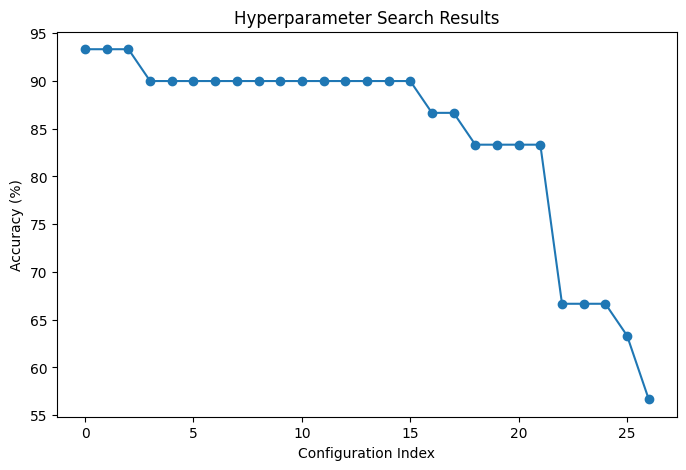

In [8]:
import pandas as pd

df = pd.DataFrame(results, columns=["Learning Rate", "Hidden Size", "Batch Size", "Accuracy"])
df_sorted = df.sort_values(by="Accuracy", ascending=False)
print("\nTop 5 Configurations:")
print(df_sorted.head(5))

plt.figure(figsize=(8,5))
plt.plot(df_sorted["Accuracy"].values, marker='o')
plt.title("Hyperparameter Search Results")
plt.xlabel("Configuration Index")
plt.ylabel("Accuracy (%)")
plt.show()
